In [1]:
import scanpy as sc
from anndata import AnnData
import numpy as np
# import requires setting a PYTHONPATH with the data_import directory
import h5ad_preparation as prep
import pandas as pd

20230112-154322.689 50728 INFO root:20 local study files stored in: /Users/sgpeo/projects/cellenium/cellenium/scratch


In [2]:
url = "https://hosted-matrices-prod.s3-us-west-2.amazonaws.com/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection-25/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad"
adata = prep.get_h5ad_from_url(url, "blood_covid")

In [3]:
prep.jupyter_h5ad_overview(adata)

,Admission,ClusterID,DPS,DTF,Donor_full,HLA1,IFN1,Sex,Status,Ventilated,cell_type_coarse,cell_type_fine,nCount_RNA,nCount_SCT,nFeature_RNA,nFeature_SCT,percent_mt,percent_rpl,percent_rps,percent_rrna,seurat_clusters,singler
covid_555_1.1,ICU,13,9,9,C1 A,-0.026053,0.015625,M,COVID,NonVent,RBC,RBC,1222.0,1682.0,125,126,1.309329,0.245499,0.081833,46.644844,12,Erythroblast
covid_555_1.2,ICU,10,9,9,C1 A,0.023525,-0.000322,M,COVID,NonVent,B,Class-switched B,1099.0,1700.0,160,160,13.102820,0.363967,0.363967,58.780708,9,B_cell
covid_555_1.3,ICU,19,9,9,C1 A,-0.044271,0.086385,M,COVID,NonVent,PB,IgG PB,1055.0,1661.0,212,213,2.938389,0.947867,0.663507,55.829384,18,B_cell
covid_555_1.7,ICU,10,9,9,C1 A,-0.038040,0.022590,M,COVID,NonVent,B,Class-switched B,2411.0,1971.0,312,312,10.908337,0.165906,0.041477,67.399422,9,B_cell
covid_555_1.8,ICU,22,9,9,C1 A,-0.043605,0.010739,M,COVID,NonVent,PB,IgA PB,2276.0,1948.0,336,336,11.203866,0.307557,0.263620,67.355011,21,B_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HIP045.2543,N/A,7,0,0,H6,0.588374,0.092001,M,Healthy,Healthy,CD14 Monocyte,CD14 Monocyte,6103.0,1959.0,2460,1080,6.898247,3.637555,2.867442,10.797968,6,Monocyte
HIP045.2544,N/A,21,0,0,H6,1.295145,0.045697,M,Healthy,Healthy,DC,DC,7324.0,2088.0,2488,1031,6.485527,6.157837,4.929000,12.738940,20,Monocyte
HIP045.2545,N/A,21,0,0,H6,0.892457,0.062819,M,Healthy,Healthy,DC,DC,6368.0,1929.0,2511,1021,4.742462,6.171483,4.978015,14.400126,20,T_cells
HIP045.2546,N/A,11,0,0,H6,0.020954,0.036953,M,Healthy,Healthy,CD16 Monocyte,CD16 Monocyte,6669.0,1918.0,2650,1063,4.573400,3.328835,2.998950,14.574899,10,Monocyte


,Selected,sct_detection_rate,sct_gmean,sct_residual_mean,sct_residual_variance,sct_variable,sct_variance
5S-rRNA,0.0,0.000261,0.000189,0.000651,1.164300,0,0.000321
7SK,0.0,0.027394,0.020371,0.005464,1.062872,0,0.035997
A1BG,0.0,0.001785,0.001268,0.002331,1.063613,0,0.002062
A1BG-AS1,0.0,0.000501,0.000356,0.001971,1.150165,0,0.000561
A1CF,0.0,0.001324,0.000942,0.002839,1.158183,0,0.001502
...,...,...,...,...,...,...,...
UGT2B17,0.0,0.001163,0.000859,-0.001669,0.938646,0,0.001663
Vault,0.0,0.000201,0.000139,-0.002708,0.750773,0,0.000201
XX-CR54.1,0.0,0.000221,0.000153,-0.002593,0.731583,0,0.000221
XXbac-B135H6.18,0.0,0.000983,0.000706,0.000535,1.047113,0,0.001162


(44721, 26361)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

(44721, 26361)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(44721, 26361)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(44721, 26361)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

OverloadedDict, wrapping:
	{'assay': 'Seq-Well', 'authors': array(["{'name': 'Aaron J Wilk'}", "{'name': 'Arjun Rustagi'}",
       "{'name': 'Nancy Q Zhao'}", "{'name': 'Jonasel Roque'}",
       "{'name': 'Giovanny J Martinez-Colon'}",
       "{'name': 'Julia L McKechnie'}", "{'name': 'Geoffrey T Ivison'}",
       "{'name': 'Thanmayi Ranganath'}", "{'name': 'Rosemary Vergara'}",
       "{'name': 'Taylor Hollis'}", "{'name': 'Laura J Simpson'}",
       "{'name': 'Philip Grant'}", "{'name': 'Aruna Subramanian'}",
       "{'name': 'Angela J Rogers', 'email': 'ajrogers@stanford.edu'}",
       "{'name': 'Catherine A Blish', 'email': 'cblish@stanford.edu'}"],
      dtype=object), 'disease': array(['COVID-19', ''], dtype=object), 'organism': 'Homo sapiens', 'preprint': {'date': '2020-04-23', 'doi': 'https://doi.org/10.1101/2020.04.17.20069930', 'title': 'A single-cell atlas of the peripheral immune response to severe COVID-19'}, 'short_name': 'Single_cell_atlas_of_peripheral_immune_response_t

20230112-154740.266 50728 INFO root:98 make_sparse: conversion to sparse matrix done
20230112-154750.641 50728 INFO root:123 make_norm_expression: no transformations necessary
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


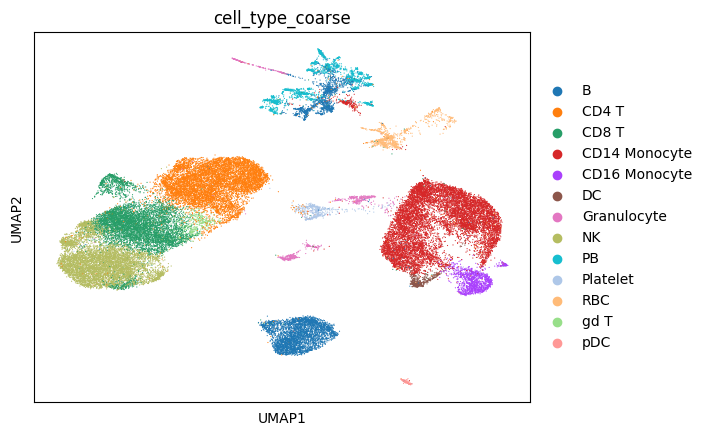

In [4]:
prep.remove_raw_and_layers(adata)
prep.make_sparse(adata)
prep.filter_outliers(adata)
prep.make_norm_expression(adata)

prep.add_umap(adata)
sc.pl.umap(adata, color='cell_type_coarse')

In [5]:
prep.set_cellenium_metadata(
    adata,
    title='A single-cell atlas of the peripheral immune response in patients with severe COVID-19',
    description='To elucidate pathways in peripheral immune cells that might lead to immunopathology or protective immunity in severe COVID-19, we applied single-cell RNA sequencing (scRNA-seq) to profile peripheral blood mononuclear cells (PBMCs) from seven patients hospitalized for COVID-19, four of whom had acute respiratory distress syndrome, and six healthy controls.',
    taxonomy_id=9606,
    ncit_tissue_ids=['C12434'],
    mesh_disease_ids=['D000086382', 'D012128'],
    X_pseudolayer_name='norm_log_expression',
    main_sample_attributes=['cell_type_coarse','cell_type_fine','Status','Ventilated']
)   

In [6]:
prep.cello_classify_celltypes(adata, 'cell_type_fine')

Found CellO resources at '/Users/sgpeo/projects/cellenium/cellenium/scratch/cello_resources/resources'.
Checking if any pre-trained model is compatible with this input dataset...


/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Could not find compatible pre-trained model.
Found CellO resources at '/Users/sgpeo/projects/cellenium/cellenium/scratch/cello_resources/resources'.
Loading ontology...
Loading expression data from /Users/sgpeo/projects/cellenium/cellenium/scratch/cello_resources/resources/training_set/log_tpm.h5...
Loaded matrix of shape (4293, 58243)
done.
Inferred that input file uses HGNC gene symbols.
Of 26259 genes in the input file, 18578 were found in the training set of 58243 genes.
Training model...
Fitting PCA with 3000 components...
done.
Transforming with PCA...
done.
(1/317)
Training classifier for label CL:0000576...
Number of positive items: 314
Number of negative items: 3950
(2/317)
Training classifier for label CL:0002087...
Number of positive items: 2010
Number of negative items: 2267
(3/317)
Training classifier for label CL:2000001...
Number of positive items: 1575
Number of negative items: 2242
(4/317)
Training classifier for label CL:0000842...
Number of positive items: 2010
Numbe

/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/cello/cello.py:477: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  ad_mean_clust = AnnData(
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Transforming with PCA...
done.
Making predictions for each classifier...
Running solver on item 1/20...
Running solver on item 2/20...
Running solver on item 3/20...
Running solver on item 4/20...
Running solver on item 5/20...
Running solver on item 6/20...
Running solver on item 7/20...
Running solver on item 8/20...
Running solver on item 9/20...
Running solver on item 10/20...
Running solver on item 11/20...
Running solver on item 12/20...
Running solver on item 13/20...
Running solver on item 14/20...
Running solver on item 15/20...
Running solver on item 16/20...
Running solver on item 17/20...
Running solver on item 18/20...
Running solver on item 19/20...
Running solver on item 20/20...
Checking if any pre-trained model is compatible with this input dataset...


/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Of 26259 genes in the input file, 18578 were found in the training set of 58243 genes.
Of 26259 genes in the input file, 17173 were found in the training set of 31283 genes.
Using thresholds stored in /Users/sgpeo/projects/cellenium/cellenium/scratch/cello_resources/resources/trained_models/ir.10x_genes_thresholds.tsv
Binarizing classifications...
Mapping each sample to its predicted labels...
Computing the most-specific predicted labels...
Loading ontology...
Item Activated Granulocyte predicted to be "mononuclear cell (CL:0000842)"
Item B predicted to be "memory B cell (CL:0000787)"
Item CD14 Monocyte predicted to be "CD14-positive, CD16-negative classical monocyte (CL:0002057)"
Item CD16 Monocyte predicted to be "CD14-positive, CD16-positive monocyte (CL:0002397)"
Item CD4 T predicted to be "CD4-positive, alpha-beta T cell (CL:0000624)"
Item CD4m T predicted to be "CD4-positive, alpha-beta memory T cell (CL:0000897)"
Item CD4n T predicted to be "naive thymus-derived CD4-positive, al

In [7]:
prep.calculate_differentially_expressed_genes(adata, ['cell_type_coarse','CellO_celltype'])

diff.exp. genes: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:51<00:00, 55.55s/it]
20230112-160043.277 50728 INFO root:292 calculate_differentially_expressed_genes: found a list of genes for these attributes: ['cell_type_coarse', 'CellO_celltype']


,names,scores,logfoldchanges,pvals,pvals_adj,ref_attr_value,cmp_attr_value,attribute_name
0,VCAN,144.408264,6.021655,0.000000e+00,0.000000e+00,CD14 Monocyte,_OTHERS_,cell_type_coarse
1,S100A9,143.884750,6.023117,0.000000e+00,0.000000e+00,CD14 Monocyte,_OTHERS_,cell_type_coarse
2,LYZ,141.730209,5.340947,0.000000e+00,0.000000e+00,CD14 Monocyte,_OTHERS_,cell_type_coarse
3,S100A8,140.828217,5.809332,0.000000e+00,0.000000e+00,CD14 Monocyte,_OTHERS_,cell_type_coarse
4,FCN1,139.999634,5.233111,0.000000e+00,0.000000e+00,CD14 Monocyte,_OTHERS_,cell_type_coarse
...,...,...,...,...,...,...,...,...
2523,EEF1B2,6.784952,0.919139,1.161253e-11,2.301638e-09,hematopoietic precursor cell,_OTHERS_,CellO_celltype
2524,TSC22D1,6.732226,2.206894,1.670866e-11,3.286993e-09,hematopoietic precursor cell,_OTHERS_,CellO_celltype
2525,EIF3L,6.723709,1.047454,1.771568e-11,3.459281e-09,hematopoietic precursor cell,_OTHERS_,CellO_celltype
2526,ANP32B,6.650226,0.982459,2.926442e-11,5.672349e-09,hematopoietic precursor cell,_OTHERS_,CellO_celltype


# final h5ad file

In [8]:
adata.write(prep.basedir.joinpath("blood_covid.h5ad"))
prep.jupyter_h5ad_overview(adata)

,Admission,ClusterID,DPS,DTF,Donor_full,HLA1,IFN1,Sex,Status,Ventilated,cell_type_coarse,cell_type_fine,nCount_RNA,nCount_SCT,nFeature_RNA,nFeature_SCT,percent_mt,percent_rpl,percent_rps,percent_rrna,seurat_clusters,singler,n_genes,CellO_celltype
covid_555_1.3,ICU,19,9,9,C1 A,-0.044271,0.086385,M,COVID,NonVent,PB,IgG PB,1055.0,1661.0,212,213,2.938389,0.947867,0.663507,55.829384,18,B_cell,213,plasmablast
covid_555_1.7,ICU,10,9,9,C1 A,-0.038040,0.022590,M,COVID,NonVent,B,Class-switched B,2411.0,1971.0,312,312,10.908337,0.165906,0.041477,67.399422,9,B_cell,312,mononuclear cell
covid_555_1.8,ICU,22,9,9,C1 A,-0.043605,0.010739,M,COVID,NonVent,PB,IgA PB,2276.0,1948.0,336,336,11.203866,0.307557,0.263620,67.355011,21,B_cell,336,lymphocyte of B lineage
covid_555_1.11,ICU,30,9,9,C1 A,-0.071987,0.064483,M,COVID,NonVent,PB,IgA PB,1166.0,1619.0,351,351,5.060034,1.114923,0.686106,36.277874,29,NK_cell,351,lymphocyte of B lineage
covid_555_1.12,ICU,8,9,9,C1 A,-0.075396,0.050378,M,COVID,NonVent,CD14 Monocyte,CD14 Monocyte,1080.0,1626.0,374,374,10.092592,0.555556,0.462963,46.481480,7,Monocyte,374,"CD14-positive, CD16-negative classical monocyte"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HIP045.2543,N/A,7,0,0,H6,0.588374,0.092001,M,Healthy,Healthy,CD14 Monocyte,CD14 Monocyte,6103.0,1959.0,2460,1080,6.898247,3.637555,2.867442,10.797968,6,Monocyte,1080,"CD14-positive, CD16-negative classical monocyte"
HIP045.2544,N/A,21,0,0,H6,1.295145,0.045697,M,Healthy,Healthy,DC,DC,7324.0,2088.0,2488,1031,6.485527,6.157837,4.929000,12.738940,20,Monocyte,1031,mononuclear cell
HIP045.2545,N/A,21,0,0,H6,0.892457,0.062819,M,Healthy,Healthy,DC,DC,6368.0,1929.0,2511,1021,4.742462,6.171483,4.978015,14.400126,20,T_cells,1021,mononuclear cell
HIP045.2546,N/A,11,0,0,H6,0.020954,0.036953,M,Healthy,Healthy,CD16 Monocyte,CD16 Monocyte,6669.0,1918.0,2650,1063,4.573400,3.328835,2.998950,14.574899,10,Monocyte,1063,"CD14-positive, CD16-positive monocyte"


,Selected,sct_detection_rate,sct_gmean,sct_residual_mean,sct_residual_variance,sct_variable,sct_variance,n_cells
5S-rRNA,0.0,0.000261,0.000189,0.000651,1.164300,0,0.000321,13
7SK,0.0,0.027394,0.020371,0.005464,1.062872,0,0.035997,1169
A1BG,0.0,0.001785,0.001268,0.002331,1.063613,0,0.002062,78
A1BG-AS1,0.0,0.000501,0.000356,0.001971,1.150165,0,0.000561,23
A1CF,0.0,0.001324,0.000942,0.002839,1.158183,0,0.001502,59
...,...,...,...,...,...,...,...,...
UGT2B17,0.0,0.001163,0.000859,-0.001669,0.938646,0,0.001663,57
Vault,0.0,0.000201,0.000139,-0.002708,0.750773,0,0.000201,10
XX-CR54.1,0.0,0.000221,0.000153,-0.002593,0.731583,0,0.000221,11
XXbac-B135H6.18,0.0,0.000983,0.000706,0.000535,1.047113,0,0.001162,45


(44141, 26361)

<44141x26361 sparse matrix of type '<class 'numpy.float32'>'
	with 44072741 stored elements in Compressed Sparse Row format>

OverloadedDict, wrapping:
	{'assay': 'Seq-Well', 'authors': array(["{'name': 'Aaron J Wilk'}", "{'name': 'Arjun Rustagi'}",
       "{'name': 'Nancy Q Zhao'}", "{'name': 'Jonasel Roque'}",
       "{'name': 'Giovanny J Martinez-Colon'}",
       "{'name': 'Julia L McKechnie'}", "{'name': 'Geoffrey T Ivison'}",
       "{'name': 'Thanmayi Ranganath'}", "{'name': 'Rosemary Vergara'}",
       "{'name': 'Taylor Hollis'}", "{'name': 'Laura J Simpson'}",
       "{'name': 'Philip Grant'}", "{'name': 'Aruna Subramanian'}",
       "{'name': 'Angela J Rogers', 'email': 'ajrogers@stanford.edu'}",
       "{'name': 'Catherine A Blish', 'email': 'cblish@stanford.edu'}"],
      dtype=object), 'disease': array(['COVID-19', ''], dtype=object), 'organism': 'Homo sapiens', 'preprint': {'date': '2020-04-23', 'doi': 'https://doi.org/10.1101/2020.04.17.20069930', 'title': 'A single-cell atlas of the peripheral immune response to severe COVID-19'}, 'short_name': 'Single_cell_atlas_of_peripheral_immune_response_t